In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read in list of beers from Beer Me!
df = pd.read_csv('../Documents/Brewery_List.csv', encoding='utf8')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9865 entries, 0 to 9864
Data columns (total 7 columns):
Brewery_Beer    9865 non-null object
Type_Names      19 non-null object
Type_Counts     19 non-null float64
Style           9865 non-null object
Location        9865 non-null object
Country         9865 non-null object
Date            9849 non-null object
dtypes: float64(1), object(6)
memory usage: 539.6+ KB


,Brewery_Beer,Type_Names,Type_Counts,Style,Location,Country,Date
0,Founders Dank Wood Imperial Red,Ale,3231.0,Wood- and Barrel-aged Strong Beer,United States - Michigan,United States,7/30/18
1,Gigantic Ginormous IPA,IPA,673.0,Imperial or Double IPA,United States - Oregon,United States,7/31/18
2,Prairie Artisan Twist Saison,Porter,459.0,Classic Saison,United States - Oklahoma,United States,7/30/18
3,Alpine Duet,Stout,725.0,American-Style IPA,United States - California,United States,7/30/18
4,Crane Raytown Common,Lambic,69.0,California Common Beer,United States - Missouri,United States,7/30/18


In [ ]:
df.head()

In [3]:
#check the number of countries in the dataset 
df['Country'].nunique()

65

In [4]:
#look at data shows counts of beer by popular types
#this data was cleaned in Excel by counting by type 
df_types = df[['Type_Names', 'Type_Counts']].sort_values(by='Type_Counts', ascending=False)
df_types.dropna(inplace=True)
df_types

,Type_Names,Type_Counts
0,Ale,3231.0
18,Beer,1302.0
3,Stout,725.0
1,IPA,673.0
2,Porter,459.0
13,Pilsener,458.0
15,Bock,427.0
17,Weissbier,384.0
14,Wit,382.0
8,Bitter,368.0


In [5]:
#assign beer types and counts to lists
beer_categories = list(df_types.Type_Names)
beer_counts = list(df_types['Type_Counts'])

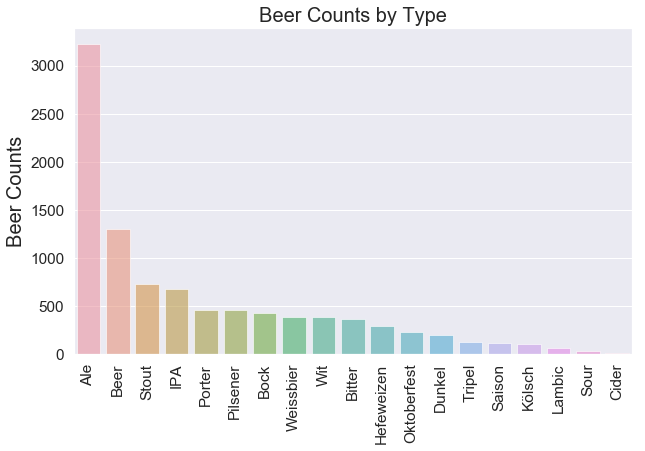

In [6]:
#graph the beers by type
#some types of beer were vague, such as "Special Beer" or were duplicated
plt.figure(figsize=(10,6))
sns.set(font_scale=1.4)
sns.barplot(y=beer_counts, x=beer_categories, alpha=0.6)
plt.xticks(rotation=90)
plt.title("Beer Counts by Type", fontsize=20)
plt.ylabel("Beer Counts", fontsize=20)
#plt.savefig("beer_counts", bbox_inches='tight', dpi=100)plt.show()

In [23]:
#Look at countries that had at least 50 beers on the list
df_countries = df.groupby(['Country']).count()
df_countries.reset_index(inplace=True)
df_top_countries = df_countries[df_countries['Brewery_Beer'] > 50]
df_top_countries

,Country,Brewery_Beer,Type_Names,Type_Counts,Style,Location,Date
3,Belgium,510,1,1,510,510,510
7,Canada,179,0,0,179,179,179
13,Denmark,91,0,0,91,91,91
20,Germany,709,0,0,709,709,706
27,Ireland,70,0,0,70,70,70
56,Switzerland,80,0,0,80,80,80
62,United Kingdom,383,0,0,383,383,383
63,United States,7333,18,18,7333,7333,7320


In [24]:
#clean top countries list and sort it 
df_top_countries = df_top_countries[['Country', 'Brewery_Beer']].sort_values(by='Brewery_Beer', ascending=False)
df_top_countries

,Country,Brewery_Beer
63,United States,7333
20,Germany,709
3,Belgium,510
62,United Kingdom,383
7,Canada,179
13,Denmark,91
56,Switzerland,80
27,Ireland,70


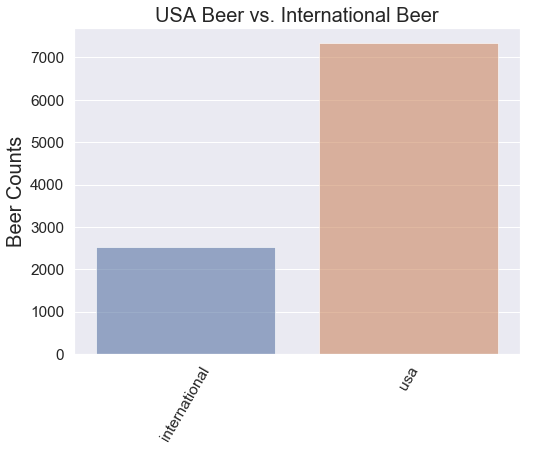

In [25]:
#assign the lists to variables so they can be graphed with Seaborn 
countries = list(df_top_countries.Country)
country_beer_count = list(df_top_countries.Brewery_Beer)

#counts of beers from USA vs. international
usa = 7333
international = 2532

#plot a comparison of USA and international beer counts
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.barplot(y=[2532, 7333], x=['international', 'usa'], alpha=0.6)
plt.xticks(rotation=60)
plt.title("USA Beer vs. International Beer", fontsize=20)
plt.ylabel("Beer Counts", fontsize=20)
#plt.savefig("beer_counts", bbox_inches='tight', dpi=100)
plt.show()

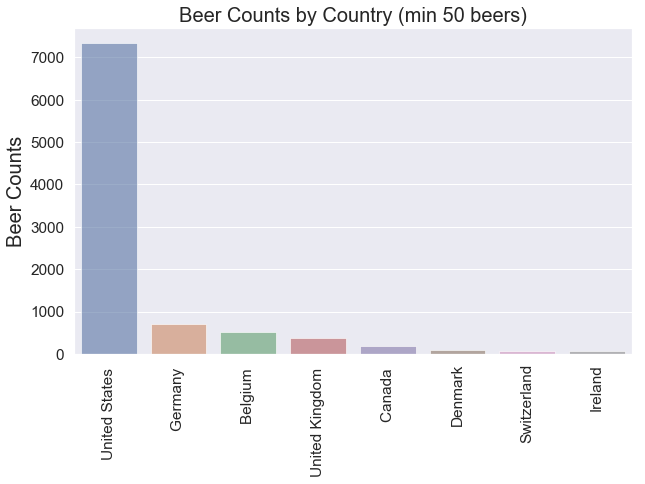

In [27]:
#plot the countries with at least 50 beers 
plt.figure(figsize=(10,6))
sns.barplot(y=country_beer_count, x=countries, alpha=0.6)
plt.xticks(rotation=90)
plt.title("Beer Counts by Country (min 50 beers)", fontsize=20)
plt.ylabel("Beer Counts", fontsize=20)
#plt.savefig("beer_counts", bbox_inches='tight', dpi=100)
plt.show()

In [12]:
#df.groupby(['Location']).count()

,Brewery_Beer,Type_Names,Type_Counts,Style,Country,Date
Location,,,,,,
Argentina,5,0,0,5,5,5
Australia - New South Wales,7,0,0,7,7,7
Australia - Queensland,2,0,0,2,2,2
Australia - South Australia,8,0,0,8,8,8
Australia - Tasmania,1,0,0,1,1,1
Australia - Victoria,4,0,0,4,4,4
Australia - Western Australia,1,0,0,1,1,1
Austria,42,0,0,42,42,42
Belgium - Antwerpen,63,0,0,63,63,63


In [13]:
#filter the data by locations to just display USA beers 
df_usa = df[df['Location'].str.contains("United States")]
df_usa.head()

,Brewery_Beer,Type_Names,Type_Counts,Style,Location,Country,Date
0,Founders Dank Wood Imperial Red,Ale,3231.0,Wood- and Barrel-aged Strong Beer,United States - Michigan,United States,7/30/18
1,Gigantic Ginormous IPA,IPA,673.0,Imperial or Double IPA,United States - Oregon,United States,7/31/18
2,Prairie Artisan Twist Saison,Porter,459.0,Classic Saison,United States - Oklahoma,United States,7/30/18
3,Alpine Duet,Stout,725.0,American-Style IPA,United States - California,United States,7/30/18
4,Crane Raytown Common,Lambic,69.0,California Common Beer,United States - Missouri,United States,7/30/18


In [14]:
#removed "United States -" from "Location" to compare state data
df_usa['Location'] = df_usa['Location'].str.replace("United States - ", "")

/Users/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
#confirm the amounts that remain 
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7333 entries, 0 to 9864
Data columns (total 7 columns):
Brewery_Beer    7333 non-null object
Type_Names      18 non-null object
Type_Counts     18 non-null float64
Style           7333 non-null object
Location        7333 non-null object
Country         7333 non-null object
Date            7320 non-null object
dtypes: float64(1), object(6)
memory usage: 458.3+ KB


In [16]:
#Change "Location" column name to "State"
df_usa.rename(columns={'Location':'State'}, inplace=True)

/Users/alex/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [17]:
#group by state values 
df_states = df_usa.groupby(['State']).count()
df_states.reset_index(inplace=True)


In [18]:
#sort values from highest beer count by state 
df_states.sort_values(by='Brewery_Beer', ascending=False, inplace=True)
df_states.head()

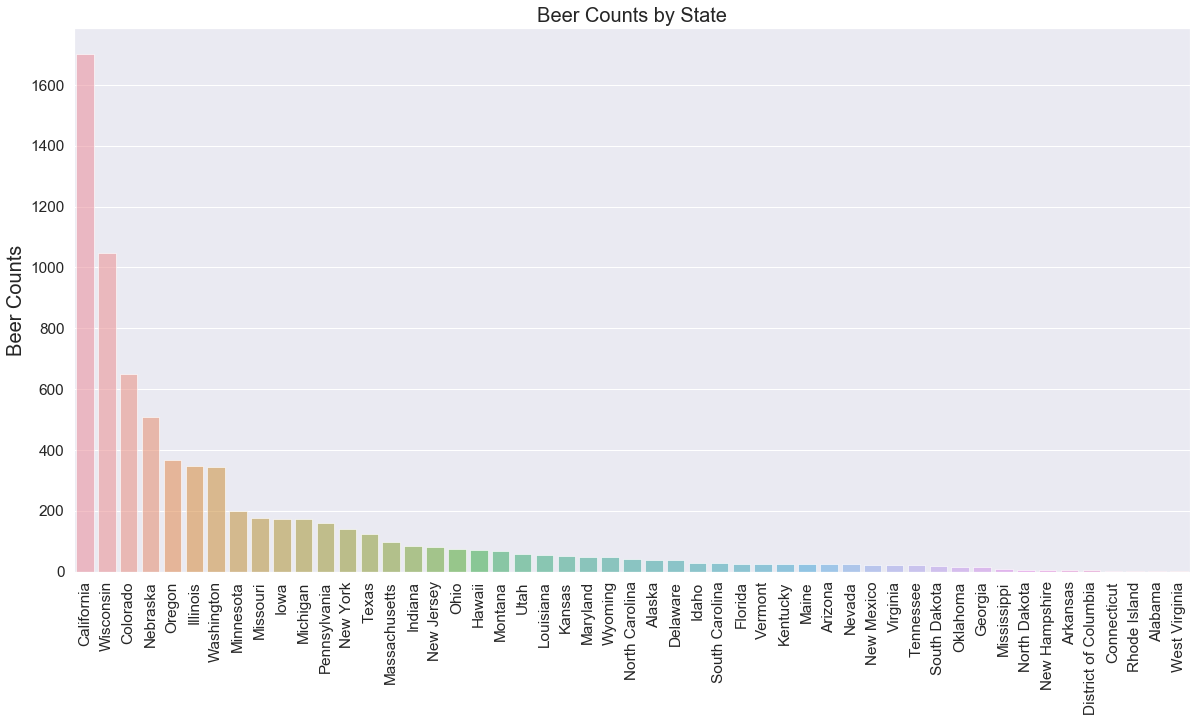

In [19]:
#plot a comparison of all of the states
states = list(df_states.State)
state_beer_count = list(df_states.Brewery_Beer)

plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)
sns.barplot(y=state_beer_count, x=states, alpha=0.6)
plt.xticks(rotation=90)
plt.title("Beer Counts by State", fontsize=20)
plt.ylabel("Beer Counts", fontsize=20)
plt.show()